## Notebook on "Social media"

Prepared by [**beatrizq**](beatriz.querido@gmail.com) ([**Eurostat**](https://ec.europa.eu/eurostat), Methodology & Innovation unit B.1).

This notebook aims at illustrating the *Statistics Expplained* article on [Social media - statistics on the use by enterprises](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Social_media_-_statistics_on_the_use_by_enterprises).

In [1]:
#EUROSTATAPICLIENT

#install modules
#pip install jsonstat.py
#pip install eurostatapiclient --no-dependencies

#import libraries
import numpy as np
import pandas as pd
import requests
import certifi
import chardet
import idna
import pytz
import six
import urllib3
import dateutil
from eurostatapiclient import EurostatAPIClient

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
#adjust settings for EurostatAPIClient
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

In [ ]:
### FILTER CODES ###

#UNIT:
#% of enterprises: PC_ENT
#% of enterprises using social media: PC_ENT_SM

#SIZE:
#large: L_C10_S951_XK
#medium: M_C10_S951_XK
#small: S_C10_S951_XK

#PURPOSE:
#develop=E_SM_PADVERT
#obtain=E_SM_PCUQOR
#recruit=E_SM_PRCR
#involve=E_SM_PCUDEV
#exchange = E_SM_PEXCHVOC
#collaborate = E_SM_PBPCOLL

#ACTIVITY:
#transportation and storage = 10_H49_53
#construction = 10_F41_43
#electricity = 10_D35_E39
#administrative = 10_N77_82
#professional = 10_M69_74
#manufacturing = 10_C10_33
#information = 10_J58_63
#real estate = 10_L68
#wholesale = 10_G45_47
#retail trade = 10_G47
#accommodation = 10_I55

## Use of social media by enterprises
Table 1: Enterprises using social media, 2019, (% of enterprises) - Source: Eurostat ([isoc_cismt](https://www.coursera.org/specializations/deep-learning#courses))

## Types of social media used over time (2013-2019)

In [3]:
#FIGURE 1: data
#source: Eurostat API (isoc_cismt)

#get data
figure1a_source = 'isoc_cismt?precision=1&geo=EU28&unit=PC_ENT&indic_is=E_SM_BLOG&indic_is=E_SM_CNTSHR&indic_is=E_SM_SNET&indic_is=E_SM_WIKI&sizen_r2=10_C10_S951_XK&unitLabel=label&time=2013&time=2015&time=2017&time=2019'
dataframe_figure1a = client.get_dataset(figure1a_source).to_dataframe()

figure1b_source = 'isoc_cismt?groupedIndicators=1&precision=1&geo=EU28&unit=PC_ENT&indic_is=E_SM1_BLOG&indic_is=E_SM1_CNTSHR&indic_is=E_SM1_SNET&indic_is=E_SM1_WIKI&sizen_r2=10_C10_S951_XK&unitLabel=label&time=2013&time=2015&time=2017&time=2019'
dataframe_figure1b = client.get_dataset(figure1b_source).to_dataframe()

dataframe_figure1 = dataframe_figure1a.copy().fillna(dataframe_figure1b)

dataframe_figure1_blog = dataframe_figure1.loc[dataframe_figure1['indic_is'] == 'E_SM_BLOG'].groupby(by = 'time')['values'].sum()
dataframe_figure1_cntshr = dataframe_figure1.loc[dataframe_figure1['indic_is'] == 'E_SM_CNTSHR'].groupby(by = 'time')['values'].sum()
dataframe_figure1_snet = dataframe_figure1.loc[dataframe_figure1['indic_is'] == 'E_SM_SNET'].groupby(by = 'time')['values'].sum()
dataframe_figure1_wiki = dataframe_figure1.loc[dataframe_figure1['indic_is'] == 'E_SM_WIKI'].groupby(by = 'time')['values'].sum()



Text(0, 1.05, 'Enterprises using social media, by type of social media, EU-28, \n2013, 2015, 2017 and 2019 \n(% of enterprises)')

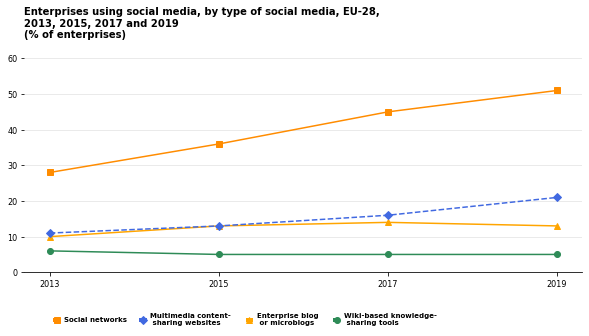

In [4]:
#FIGURE 1: graph

#size of graph
fig, ax = plt.subplots(figsize=(10, 4))

#grid
plt.style.use('default') #aesthetic of sheet
ax.grid(True, which = 'major', axis = 'y' , color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.tick_params(axis = 'both',which = 'major' , labelsize = 8) #size of labels in axis

#scale of graph
plt.ylim(0,61)
plt.yticks(np.arange(0, 61, step=10))

#plot the data
plt.plot(dataframe_figure1_blog, color='orange', marker ='^')
plt.plot(dataframe_figure1_cntshr, color='royalblue', marker ='D', linestyle = 'dashed')
plt.plot(dataframe_figure1_snet, color='darkorange', marker ='s')
plt.plot(dataframe_figure1_wiki, color='seagreen', marker ='o')

#legend
leg_snet = Line2D([0],[0], lw=4, color='darkorange', label='Social networks', marker='s')
leg_cntshr = Line2D([0],[0], lw=4, color='royalblue', label='Multimedia content- \n sharing websites', marker='D')
leg_blog = Line2D([0],[0], lw=4, color='orange', label='Enterprise blog \n or microblogs', marker='^')
leg_wiki = Line2D([0],[0], lw=4, color='seagreen', label='Wiki-based knowledge- \n sharing tools', marker='o')

leg = ax.legend(handles=[leg_snet,leg_cntshr,leg_blog,leg_wiki], frameon=False, loc=(0.05, -.26), ncol=4, prop={'weight':'bold','size':'7'}, labelspacing=0.1, handlelength=0.5)

#title
ax.set_title('Enterprises using social media, by type of social media, EU-28, \n2013, 2015, 2017 and 2019 \n(% of enterprises)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = 0, y =1.05)

Figure 1: Enterprises using social media, by type of social media, EU-28, 2013, 2015, 2017 and 2019 (% of enterprises)  - Source: Eurostat ([isoc_cismt](https://www.coursera.org/specializations/deep-learning#courses))

In [5]:
#FIGURE 2: data
#source: Eurostat API (isoc_cismt)

countries_names = {'AT':'Austria', 'BE':'Belgium', 'BG':'Bulgaria', 'CY': 'Cyprus', 'CZ': 'Czechia', 'DE': 'Germany', 'DK':'Denmark', 'EE':'Estonia', 'EL': 'Greece', 'ES':'Spain', 'FI':'Finland', 'FR':'France', 'HR':'Croatia', 'HU':'Hungary', 'IE':'Ireland', 'IT':'Italy', 'LT':'Lithuania', 'LU':'Luxembourg', 'LV':'Latvia', 'MT':'Malta', 'NL':'Netherlands', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'SE':'Sweden', 'SI':'Slovenia','SK':'Slovakia', 'UK':'United Kingdom', 'EU28': 'EU-28', 'TR':'Turkey','CH':'Switzerland', 'IS':'Iceland', 'MK':'North Macedonia','ME':'Montenegro',
'NO':'Norway', 'RS': 'Serbia'}

#get data
figure2_2013_source = 'isoc_cismt?precision=1&geo=AT&geo=BE&geo=BG&geo=CY&geo=CZ&geo=DE&geo=DK&geo=EE&geo=EL&geo=ES&geo=EU28&geo=FI&geo=FR&geo=HR&geo=HU&geo=IE&geo=IS&geo=IT&geo=LT&geo=LU&geo=LV&geo=MT&geo=NL&geo=NO&geo=PL&geo=PT&geo=RO&geo=SE&geo=SI&geo=SK&geo=UK&unit=PC_ENT&indic_is=E_SM_SNET&sizen_r2=10_C10_S951_XK&unitLabel=label&time=2013'
dataframe_figure2_2013 = client.get_dataset(figure2_2013_source).to_dataframe()

figure2_2019_source = 'isoc_cismt?precision=1&geo=AT&geo=BE&geo=BG&geo=CY&geo=CZ&geo=DE&geo=DK&geo=EE&geo=EL&geo=ES&geo=EU28&geo=FI&geo=FR&geo=HR&geo=HU&geo=IE&geo=IS&geo=IT&geo=LT&geo=LU&geo=LV&geo=MT&geo=NL&geo=NO&geo=PL&geo=PT&geo=RO&geo=SE&geo=SI&geo=SK&geo=UK&unit=PC_ENT&indic_is=E_SM1_SNET&sizen_r2=10_C10_S951_XK&unitLabel=label&time=2019'
dataframe_figure2_2019 = client.get_dataset(figure2_2019_source).to_dataframe()

#organize 2019 layer
dataframe_figure2_2019_eu28 = dataframe_figure2_2019[dataframe_figure2_2019['geo'] == 'EU28']

dataframe_figure2_2019_onlyEU = dataframe_figure2_2019[(dataframe_figure2_2019.geo != 'NO') & (dataframe_figure2_2019.geo != 'IS') & (dataframe_figure2_2019.geo != 'EU28')].sort_values(by = ['values'],ascending = False)

dataframe_figure2_2019_notEU = dataframe_figure2_2019[(dataframe_figure2_2019['geo'] == 'NO') | (dataframe_figure2_2019['geo'] == 'IS')].sort_values(by = ['values'],ascending = False)

dataframe_figure2_2019_sorted = pd.concat([dataframe_figure2_2019_eu28, dataframe_figure2_2019_onlyEU, dataframe_figure2_2019_notEU], ignore_index=False).reset_index()

#organize 2013 layer
dataframe_figure2_2013_sorted = dataframe_figure2_2013.set_index('geo')
dataframe_figure2_2013_sorted = dataframe_figure2_2013_sorted.reindex(index=dataframe_figure2_2019_sorted['geo'])
dataframe_figure2_2013_sorted = dataframe_figure2_2013_sorted.reset_index()

#replace names
dataframe_figure2_2013_sorted = dataframe_figure2_2013_sorted.replace({'geo':countries_names})
dataframe_figure2_2019_sorted = dataframe_figure2_2019_sorted.replace({'geo':countries_names})

figure2_bars_2019 = dataframe_figure2_2019_sorted['values'].tolist()
figure2_bars_2013 = dataframe_figure2_2013_sorted['values'].tolist()
figure2_bars_2019_dif = [a - b for a,b in zip(figure2_bars_2019,figure2_bars_2013)]
figure2_countries = dataframe_figure2_2019_sorted['geo'].tolist()


Text(0, 1.05, 'Enterprises using social networks, 2013 and 2019 \n(% of enterprises)')

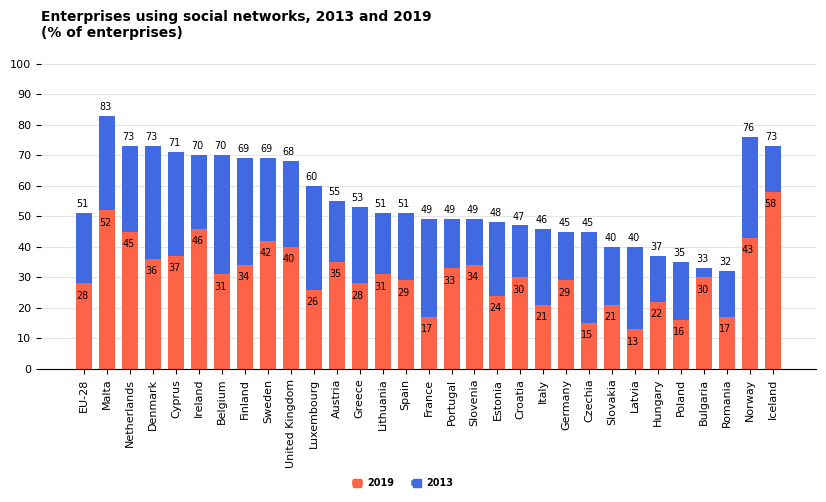

In [6]:
#FIGURE 2: graph

r = range(len(figure2_countries))

figure2_years = ['2013','2019']

colors = ['tomato', 'royalblue']

fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(True, which = 'major', axis = 'y', color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.set_axisbelow(True) #set the grid below the bars
plt.xticks(r, figure2_countries, rotation= 90) #x labels
ax.set_ylim(0, 101)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8) #size of labels in axis
plt.yticks(np.arange(0, 101, step=10))

barWidth = 0.7
bars_2013 = plt.bar(r, figure2_bars_2013, color=colors[0], width=barWidth, label=figure2_years[0])

bars_2019 = plt.bar(r, figure2_bars_2019_dif, bottom=figure2_bars_2013, color=colors[1], width=barWidth, label=figure2_years[1])

for bar_2013, bar_2019 in zip(bars_2013,bars_2019):
    h_2013 = bar_2013.get_height()
    h_2019 = bar_2019.get_height()
    x_2013 = bar_2013.get_x()
    x_2019 = bar_2019.get_x()
    x = x_2013 + x_2019
    h = h_2013 + h_2019
    plt.text(x_2019, h + 2, h, fontsize='x-small')
    plt.text(x_2013, h_2013 - 5, h_2013, fontsize='x-small')

#title
ax.set_title('Enterprises using social networks, 2013 and 2019 \n(% of enterprises)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = 0, y =1.05)

#legend
leg_2019 = Line2D([0],[0], lw=4, color='tomato', label='2019', marker='s')
leg_2013 = Line2D([0],[0], lw=4, color='royalblue', label='2013', marker='s')

leg = ax.legend(handles=[leg_2019,leg_2013], frameon=False, loc=(0.4, -.4), ncol=2, prop={'weight':'bold','size':'7'}, labelspacing=0.5, handlelength=0.5)

ax.set_title('Enterprises using social networks, 2013 and 2019 \n(% of enterprises)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = 0, y =1.05)


In [43]:
#FIGURE 3: data
#source: Eurostat API (isoc_cismt)

#get data
figure3_source = 'isoc_cismt?precision=1&geo=EU28&unit=PC_ENT&indic_is=E_SM1_BLOG&indic_is=E_SM1_CNTSHR&indic_is=E_SM1_SNET&indic_is=E_SM1_WIKI&sizen_r2=L_C10_S951_XK&sizen_r2=M_C10_S951_XK&sizen_r2=S_C10_S951_XK&unitLabel=label&time=2019'

dataframe_figure3 = client.get_dataset(figure3_source).to_dataframe().set_index('indic_is')

media_order = ['E_SM1_SNET','E_SM1_CNTSHR','E_SM1_BLOG','E_SM1_WIKI']

figure3_bars_large = dataframe_figure3[(dataframe_figure3['sizen_r2'] == 'L_C10_S951_XK')].reindex(media_order)['values'].tolist()

figure3_bars_medium = dataframe_figure3[(dataframe_figure3['sizen_r2'] == 'M_C10_S951_XK')].reindex(media_order)['values'].tolist()

figure3_bars_small = dataframe_figure3[(dataframe_figure3['sizen_r2'] == 'S_C10_S951_XK')].reindex(media_order)['values'].tolist()

#figure3_bars_large = dataframe_figure3[(dataframe_figure3['sizen_r2'] == 'L_C10_S951_XK')].sort_values(by = ['values'],ascending = False)['values'].tolist()

#figure3_bars_medium = dataframe_figure3[(dataframe_figure3['sizen_r2'] == 'M_C10_S951_XK')].sort_values(by = ['values'],ascending = False)['values'].tolist()

#figure3_bars_small = dataframe_figure3[(dataframe_figure3['sizen_r2'] == 'S_C10_S951_XK')].sort_values(by = ['values'],ascending = False)['values'].tolist()


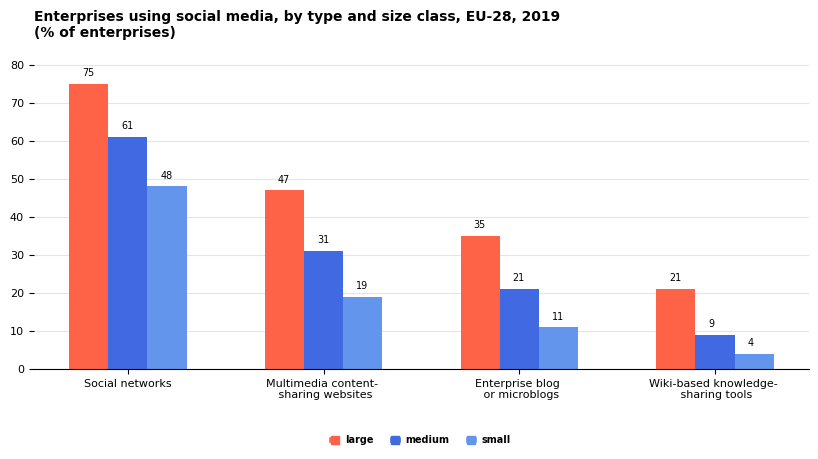

In [45]:
#FIGURE 3: graph

media_types = ['Social networks','Multimedia content- \n sharing websites','Enterprise blog \n or microblogs','Wiki-based knowledge- \n sharing tools']

sizes = ['large','medium','small']

colors = ['tomato', 'royalblue', 'cornflowerblue']

r = np.arange(len(media_types))

fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(True, which = 'major', axis = 'y', color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.set_axisbelow(True) #set the grid below the bars
plt.xticks(r, media_types, rotation= 0) #x labels
ax.set_ylim(0, 81)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8) #size of labels in axis
plt.yticks(np.arange(0, 81, step=10))
barWidth = 0.2 #width of bars

bars_large = plt.bar(r - barWidth, figure3_bars_large, color=colors[0], width=barWidth, label=sizes[0])

bars_medium = plt.bar(r, figure3_bars_medium, color=colors[1], width=barWidth, label=sizes[1])

bars_small = plt.bar(r + barWidth, figure3_bars_small, color=colors[2], width=barWidth, label=sizes[2])

for bars_large, bars_medium, bars_small in zip(bars_large,bars_medium,bars_small):
    h_large = bars_large.get_height()
    h_medium = bars_medium.get_height()
    h_small = bars_small.get_height()
    x_large = bars_large.get_x()
    x_medium = bars_medium.get_x()
    x_small = bars_small.get_x()
    plt.text(x_large + barWidth/3, h_large +2, h_large, fontsize='x-small')
    plt.text(x_medium + barWidth/3, h_medium +2, h_medium, fontsize='x-small')
    plt.text(x_small + barWidth/3, h_small +2, h_small, fontsize='x-small')

#title
ax.set_title('Enterprises using social media, by type and size class, EU-28, 2019 \n(% of enterprises)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = 0.0, y =1.05)

#legend
leg_large = Line2D([0],[0], lw=4, color='tomato', label='large', marker='s')
leg_medium = Line2D([0],[0], lw=4, color='royalblue', label='medium', marker='s')
leg_small = Line2D([0],[0], lw=4, color='cornflowerblue', label='small', marker='s')

leg = ax.legend(handles=[leg_large,leg_medium,leg_small], frameon=False, loc=(0.38, -0.26), ncol=3, prop={'weight':'bold','size':'7'}, labelspacing=0.5, handlelength=0.5)


In [9]:
#FIGURE 4: data
#source: Eurostat API (isoc_cismt)

#get data
figure4_source = 'isoc_cismt?precision=1&geo=EU28&unit=PC_ENT&indic_is=E_SM1_BLOG&indic_is=E_SM1_CNTSHR&indic_is=E_SM1_SNET&indic_is=E_SM1_WIKI&sizen_r2=10_C10_33&sizen_r2=10_D35_E39&sizen_r2=10_F41_43&sizen_r2=10_G45_47&sizen_r2=10_G47&sizen_r2=10_H49_53&sizen_r2=10_I55&sizen_r2=10_J58_63&sizen_r2=10_L68&sizen_r2=10_M69_74&sizen_r2=10_N77_82&unitLabel=label&time=2019'

dataframe_figure4 = client.get_dataset(figure4_source).to_dataframe().set_index('sizen_r2')

types_order = ['10_F41_43','10_H49_53','10_D35_E39','10_C10_33','10_L68','10_N77_82','10_M69_74','10_G45_47','10_G47','10_J58_63','10_I55']


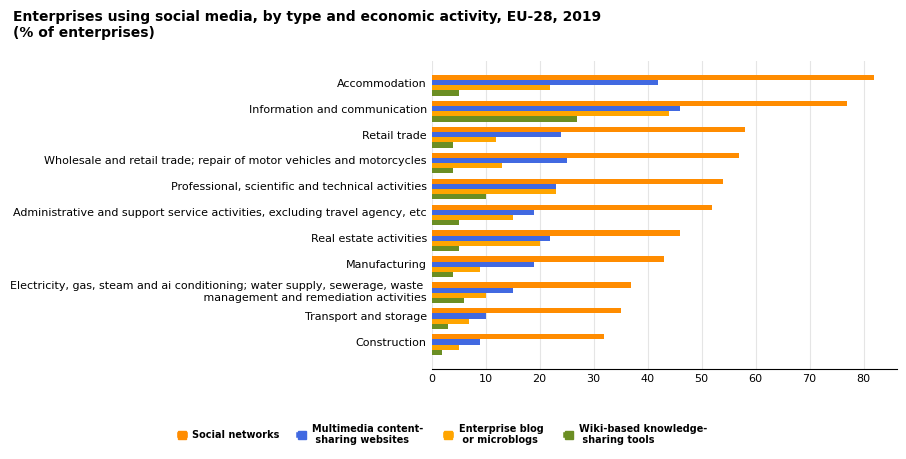

In [10]:
#FIGURE 4: graph

figure4_network = dataframe_figure4[(dataframe_figure4['indic_is'] == 'E_SM1_SNET')].reindex(types_order)['values'].tolist()

figure4_multimedia = dataframe_figure4[(dataframe_figure4['indic_is'] == 'E_SM1_CNTSHR')].reindex(types_order)['values'].tolist()

figure4_blog = dataframe_figure4[(dataframe_figure4['indic_is'] == 'E_SM1_BLOG')].reindex(types_order)['values'].tolist()

figure4_wiki = dataframe_figure4[(dataframe_figure4['indic_is'] == 'E_SM1_WIKI')].reindex(types_order)['values'].tolist()

economic_activities = ['Construction','Transport and storage','Electricity, gas, steam and ai conditioning; water supply, sewerage, waste \n management and remediation activities','Manufacturing','Real estate activities','Administrative and support service activities, excluding travel agency, etc','Professional, scientific and technical activities','Wholesale and retail trade; repair of motor vehicles and motorcycles','Retail trade','Information and communication','Accommodation']

media_types = ['Wiki-based knowledge- \n sharing tools','Enterprise blog \n or microblogs','Multimedia content- \n sharing websites','Social networks']

colors = ['olivedrab','orange','royalblue','darkorange']

r = np.arange(len(economic_activities))

fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(True, which = 'major', axis = 'x', color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.set_axisbelow(True) #set the grid below the bars
barSize = 2.2/len(economic_activities) #width of bars
plt.yticks(r + barSize*2, economic_activities, rotation= 0) #y labels
#ax.set_ylim(0-barSize, max(yticks) + len(economic_activities)*barSize)
ax.tick_params(axis = 'both', which = 'major', length=0, labelsize = 8) #size of labels in axis
plt.xticks(np.arange(0, 91, step=10))

#ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])

bars_wiki = plt.barh(r, figure4_wiki, align= 'center', color=colors[0], height=barSize, label=media_types[0])

bars_blog = plt.barh(r + barSize, figure4_blog, align= 'center', color=colors[1], height=barSize, label=media_types[1])

bars_multimedia = plt.barh(r + barSize*2, figure4_multimedia, align= 'center', color=colors[2], height=barSize, label=media_types[2])

bars_network = plt.barh(r + barSize*3, figure4_network, align= 'center', color=colors[3], height=barSize, label=media_types[3])

#title
ax.set_title('Enterprises using social media, by type and economic activity, EU-28, 2019 \n(% of enterprises)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = -0.9, y =1.05)

#legend
leg_snet = Line2D([0],[0], lw=4, color='darkorange', label='Social networks', marker='s')
leg_cntshr = Line2D([0],[0], lw=4, color='royalblue', label='Multimedia content- \n sharing websites', marker='s')
leg_blog = Line2D([0],[0], lw=4, color='orange', label='Enterprise blog \n or microblogs', marker='s')
leg_wiki = Line2D([0],[0], lw=4, color='olivedrab', label='Wiki-based knowledge- \n sharing tools', marker='s')

leg = ax.legend(handles=[leg_snet,leg_cntshr,leg_blog,leg_wiki], frameon=False, loc=(-0.55, -.26), ncol=4, prop={'weight':'bold','size':'7'}, labelspacing=0.2, handlelength=0.5)


In [38]:
#FIGURE 5: data
#source: Eurostat Data Browser (isoc_cismt)

dataframe_figure5 = pd.read_excel(r'C:\Users\Beatriz\Documents\1-WORK\GitHub\statistics-coded\science\digital_economy_society_statistics\social_media_graph5_data.xlsx', index_col=None, header=0)

dataframe_figure5_develop = dataframe_figure5.loc[dataframe_figure5['indic_is'] == 'E_SM_PADVERT'].groupby(by = 'time')['values'].sum()
dataframe_figure5_obtain = dataframe_figure5.loc[dataframe_figure5['indic_is'] == 'E_SM_PCUQOR'].groupby(by = 'time')['values'].sum()
dataframe_figure5_recruit = dataframe_figure5.loc[dataframe_figure5['indic_is'] == 'E_SM_PRCR'].groupby(by = 'time')['values'].sum()
dataframe_figure5_exchange = dataframe_figure5.loc[dataframe_figure5['indic_is'] == 'E_SM_PEXCHVOC'].groupby(by = 'time')['values'].sum()
dataframe_figure5_involve = dataframe_figure5.loc[dataframe_figure5['indic_is'] == 'E_SM_PCUDEV'].groupby(by = 'time')['values'].sum()
dataframe_figure5_collaborate = dataframe_figure5.loc[dataframe_figure5['indic_is'] == 'E_SM_PBPCOLL'].groupby(by = 'time')['values'].sum()


Text(-0.03, 1.05, 'Enterprises using social media, by purpose of use, EU-28, \n2013, 2015, 2017 and 2019 \n(% of enterprises)')

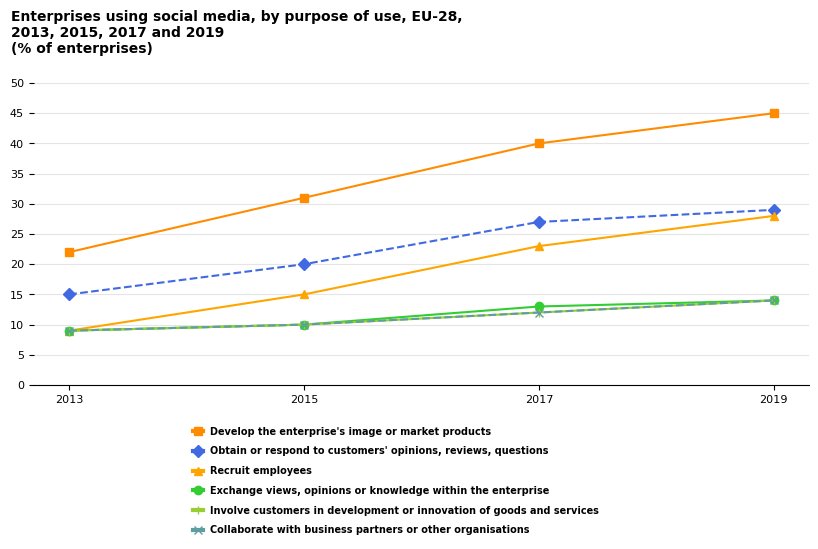

In [39]:
#FIGURE 5: graph

#size of graph
fig, ax = plt.subplots(figsize=(10, 4))

#grid
plt.style.use('default') #aesthetic of sheet
ax.grid(True, which = 'major', axis = 'y' , color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.tick_params(axis = 'both',which = 'major' , labelsize = 8) #size of labels in axis
ax.xaxis.set_major_locator(ticker.FixedLocator([2013, 2015, 2017, 2019]))

#scale of graph
plt.ylim(0,51)
plt.yticks(np.arange(0, 51, step=5))

#plot the data
plt.plot(dataframe_figure5_develop, color='darkorange', marker ='s')
plt.plot(dataframe_figure5_obtain, color='royalblue', marker ='D', linestyle = 'dashed')
plt.plot(dataframe_figure5_recruit, color='orange', marker ='^')
plt.plot(dataframe_figure5_exchange, color='limegreen', marker ='o')
plt.plot(dataframe_figure5_involve, color='yellowgreen', marker ='|')
plt.plot(dataframe_figure5_collaborate, color='cadetblue', marker ='x', linestyle = 'dashed')

#legend
leg_develop = Line2D([0],[0], lw=3, color='darkorange', label='Develop the enterprise\'s image or market products', marker='s')
leg_obtain = Line2D([0],[0], lw=3, color='royalblue', label='Obtain or respond to customers\' opinions, reviews, questions', marker='D')
leg_recruit = Line2D([0],[0], lw=3, color='orange', label='Recruit employees', marker='^')
leg_exchange = Line2D([0],[0], lw=3, color='limegreen', label='Exchange views, opinions or knowledge within the enterprise', marker='o')
leg_involve = Line2D([0],[0], lw=3, color='yellowgreen', label='Involve customers in development or innovation of goods and services', marker='|')
leg_collaborate = Line2D([0],[0], lw=3, color='cadetblue', label='Collaborate with business partners or other organisations', marker='x')

leg = ax.legend(handles=[leg_develop,leg_obtain,leg_recruit,leg_exchange,leg_involve,leg_collaborate], frameon=False, loc=(0.2, -.5), ncol=1, prop={'weight':'bold','size':'7'}, labelspacing=1, handlelength=1)

#title
ax.set_title('Enterprises using social media, by purpose of use, EU-28, \n2013, 2015, 2017 and 2019 \n(% of enterprises)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = -0.03, y =1.05)

In [33]:
#FIGURE 6: data
#source: Eurostat Data Browser (isoc_cismt)

dataframe_figure6 = pd.read_excel(r'C:\Users\Beatriz\Documents\1-WORK\GitHub\statistics-coded\science\digital_economy_society_statistics\social_media_graph6_data.xlsx', index_col=None, header=0).set_index('indic_is')

purpose_order = ['E_SM_PADVERT','E_SM_PCUQOR','E_SM_PRCR','E_SM_PEXCHVOC','E_SM_PCUDEV','E_SM_PBPCOLL']

figure6_bars_large = dataframe_figure6[(dataframe_figure6['sizen_r2'] == 'L_C10_S951_XK')].reindex(purpose_order)['values'].tolist()

figure6_bars_medium = dataframe_figure6[(dataframe_figure6['sizen_r2'] == 'M_C10_S951_XK')].reindex(purpose_order)['values'].tolist()

figure6_bars_small = dataframe_figure6[(dataframe_figure6['sizen_r2'] == 'S_C10_S951_XK')].reindex(purpose_order)['values'].tolist()


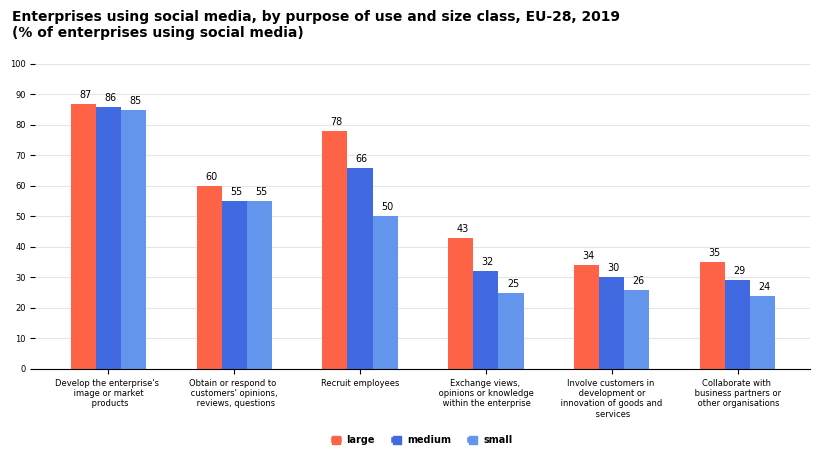

In [34]:
#FIGURE 6: graph

purposes = ['Develop the enterprise\'s \n image or market \n products','Obtain or respond to \n customers\' opinions, \n reviews, questions','Recruit employees','Exchange views, \n opinions or knowledge \n within the enterprise','Involve customers in \n development or \n innovation of goods and \n services','Collaborate with \n business partners or \n other organisations']

sizes = ['large','medium','small']

colors = ['tomato', 'royalblue', 'cornflowerblue']

r = np.arange(len(purposes))

fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(True, which = 'major', axis = 'y', color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.set_axisbelow(True) #set the grid below the bars
plt.xticks(r, purposes, rotation= 0) #x labels
ax.set_ylim(0, 101)
ax.tick_params(axis = 'both', which = 'major', labelsize = 6) #size of labels in axis
plt.yticks(np.arange(0, 101, step=10))
barWidth = 0.2 #width of bars

bars_large = plt.bar(r - barWidth, figure6_bars_large, color=colors[0], width=barWidth, label=sizes[0])

bars_medium = plt.bar(r, figure6_bars_medium, color=colors[1], width=barWidth, label=sizes[1])

bars_small = plt.bar(r + barWidth, figure6_bars_small, color=colors[2], width=barWidth, label=sizes[2])

for bars_large, bars_medium, bars_small in zip(bars_large,bars_medium,bars_small):
    h_large = bars_large.get_height()
    h_medium = bars_medium.get_height()
    h_small = bars_small.get_height()
    x_large = bars_large.get_x()
    x_medium = bars_medium.get_x()
    x_small = bars_small.get_x()
    plt.text(x_large + barWidth/3, h_large +2, h_large, fontsize='x-small')
    plt.text(x_medium + barWidth/3, h_medium +2, h_medium, fontsize='x-small')
    plt.text(x_small + barWidth/3, h_small +2, h_small, fontsize='x-small')

#title
ax.set_title('Enterprises using social media, by purpose of use and size class, EU-28, 2019 \n(% of enterprises using social media)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = -0.03, y =1.05)

#legend
leg_large = Line2D([0],[0], lw=4, color='tomato', label='large', marker='s')
leg_medium = Line2D([0],[0], lw=4, color='royalblue', label='medium', marker='s')
leg_small = Line2D([0],[0], lw=4, color='cornflowerblue', label='small', marker='s')

leg = ax.legend(handles=[leg_large,leg_medium,leg_small], frameon=False, loc=(0.38, -.26), ncol=3, prop={'weight':'bold','size':'7'}, labelspacing=0.5, handlelength=0.5)


In [16]:
#FIGURE 7: data
#source: Eurostat Data Browser (isoc_cismt)

dataframe_figure7 = pd.read_excel(r'C:\Users\Beatriz\Documents\1-WORK\GitHub\statistics-coded\science\digital_economy_society_statistics\social_media_graph7_data.xlsx', index_col=None, header=0).set_index('sizen_r2')

activities_order = ['10_H49_53','10_F41_43','10_D35_E39','10_N77_82','10_M69_74','10_C10_33','10_J58_63','10_L68','10_G45_47','10_G47','10_I55']

figure7_involve = dataframe_figure7[(dataframe_figure7['indic_is'] == 'E_SM_PCUDEV')].reindex(activities_order)['values'].tolist()

figure7_recruit = dataframe_figure7[(dataframe_figure7['indic_is'] == 'E_SM_PRCR')].reindex(activities_order)['values'].tolist()

figure7_obtain = dataframe_figure7[(dataframe_figure7['indic_is'] == 'E_SM_PCUQOR')].reindex(activities_order)['values'].tolist()

figure7_develop = dataframe_figure7[(dataframe_figure7['indic_is'] == 'E_SM_PADVERT')].reindex(activities_order)['values'].tolist()


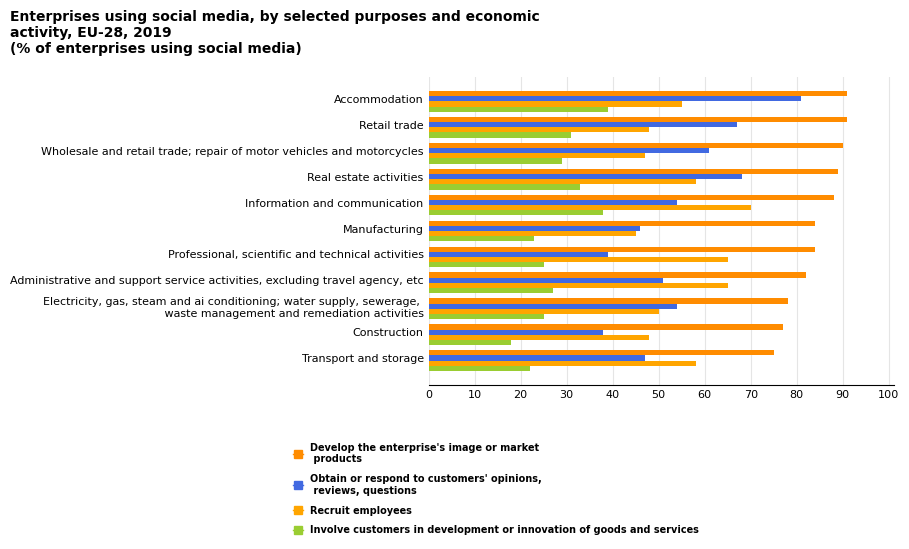

In [32]:
#FIGURE 7: graph

economic_activities = ['Transport and storage','Construction','Electricity, gas, steam and ai conditioning; water supply, sewerage, \n waste management and remediation activities','Administrative and support service activities, excluding travel agency, etc','Professional, scientific and technical activities','Manufacturing','Information and communication','Real estate activities','Wholesale and retail trade; repair of motor vehicles and motorcycles','Retail trade','Accommodation']

purposes = ['Involve customers in \n development or \n innovation of goods and \n services','Recruit employees','Obtain or respond to \n customers\' opinions, \n reviews, questions','Develop the enterprise\'s \n image or market \n products']

colors = ['yellowgreen','orange','royalblue','darkorange']

r = np.arange(len(economic_activities))

fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(True, which = 'major', axis = 'x', color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.set_axisbelow(True) #set the grid below the bars
barSize = 2.2/len(economic_activities) #width of bars
plt.yticks(r + barSize*2, economic_activities, rotation= 0) #y labels
ax.set_xlim(0,101)
ax.tick_params(axis = 'both', which = 'major', length=0, labelsize = 8) #size of labels in axis
plt.xticks(np.arange(0, 101, step=10))

#ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])

bars_involve = plt.barh(r, figure7_involve, align= 'center', color=colors[0], height=barSize, label=purposes[0])

bars_recruit = plt.barh(r + barSize, figure7_recruit, align= 'center', color=colors[1], height=barSize, label=purposes[1])

bars_obtain = plt.barh(r + barSize*2, figure7_obtain, align= 'center', color=colors[2], height=barSize, label=purposes[2])

bars_develop = plt.barh(r + barSize*3, figure7_develop, align= 'center', color=colors[3], height=barSize, label=purposes[3])

#title
ax.set_title('Enterprises using social media, by selected purposes and economic \nactivity, EU-28, 2019 \n(% of enterprises using social media)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = -0.9, y =1.05)

#legend
leg_develop = Line2D([0],[0], lw=1, color=colors[3], label='Develop the enterprise\'s image or market \n products', marker='s')
leg_obtain = Line2D([0],[0], lw=1, color=colors[2], label='Obtain or respond to customers\' opinions, \n reviews, questions', marker='s')
leg_recruit = Line2D([0],[0], lw=1, color=colors[1], label='Recruit employees', marker='s')
leg_involve = Line2D([0],[0], lw=1, color=colors[0], label='Involve customers in development or innovation of goods and services', marker='s')

leg = ax.legend(handles=[leg_develop,leg_obtain,leg_recruit,leg_involve], frameon=False, loc=(-0.3, -.5), ncol=1, prop={'weight':'bold','size':'7'}, labelspacing=1, handlelength=1)
